<a href="https://colab.research.google.com/github/ayumitakayuki/artificial_intelligence/blob/main/UASAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# UJIAN AKHIR SEMESTER
# IND323 - Artificial Intelegence CR001
# Dosen Pengampu : Dr. Wisnu Indrawan, S.Si., M.T.
# Ayumi Permana 20220801127
# Ilmu Komputer/Teknik Informatika

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

from google.colab import files

# Upload file secara manual
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
# Langkah 1: Preprocessing Data
# 1. Dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3949 entries, 9 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3949 non-null   object 
 1   type          3949 non-null   object 
 2   title         3949 non-null   object 
 3   director      3949 non-null   object 
 4   cast          3949 non-null   object 
 5   country       3949 non-null   object 
 6   date_added    3949 non-null   object 
 7   release_year  3949 non-null   float64
 8   rating        3949 non-null   object 
 9   duration      3949 non-null   object 
 10  listed_in     3949 non-null   object 
 11  description   3949 non-null   object 
 12  cluster       3949 non-null   float64
 13  type_encoded  3949 non-null   float64
dtypes: float64(3), object(11)
memory usage: 462.8+ KB


(None,
    show_id   type                title             director  \
 9      s10  Movie         The Starling       Theodore Melfi   
 12     s13  Movie         Je Suis Karl  Christian Schwochow   
 28     s29  Movie           Dark Skies        Scott Stewart   
 29     s30  Movie             Paranoia       Robert Luketic   
 38     s39  Movie  Birth of the Dragon         George Nolfi   
 
                                                  cast  \
 9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
 12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
 28  Keri Russell, Josh Hamilton, J.K. Simmons, Dak...   
 29  Liam Hemsworth, Gary Oldman, Amber Heard, Harr...   
 38  Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...   
 
                          country          date_added  release_year rating  \
 9                  United States  September 24, 2021           1.0  PG-13   
 12       Germany, Czech Republic  September 23, 2021           1.0  TV-MA   
 28                 Uni

In [ ]:
# 2. Bersihkan Data (hilangkan missing value, outlier)
# Menangani missing values
print("\nJumlah Missing Values:")
print(df.isnull().sum())


Jumlah Missing Values:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
cluster         0
type_encoded    0
dtype: int64


In [ ]:
# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)
print("\nData setelah menghapus missing values:")
display(df.head())


Data setelah menghapus missing values:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster,type_encoded
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2,0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,0,1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,0,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,0,0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2,0


In [ ]:
# Mendeteksi dan menangani outlier menggunakan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
# kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df = remove_outliers(df, col)

print("\nData setelah menghapus outlier:")
display(df.head())


Data setelah menghapus outlier:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster,type_encoded
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,0,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,0,0
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,0,0
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",0,0
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,0,0


In [ ]:
# 3. Normalisasi/transformasi data
# Normalisasi data
scaler = MinMaxScaler()
if len(numeric_columns) > 0:
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    print("\nData setelah normalisasi:")
    display(df.head())


Data setelah normalisasi:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster,type_encoded
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",1.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,0.0,0.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",1.0,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,0.0,0.0
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",0.2,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,0.0,0.0
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",0.2,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",0.0,0.0
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",0.6,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,0.0,0.0


In [ ]:
# 4. Pilih fitur-fitur relevan
# Memilih fitur yang relevan (ubah sesuai kebutuhan)
selected_columns = ['title', 'release_year', 'rating']  # Contoh kolom relevan
df_selected = df[selected_columns]
print("\nDataset setelah pemilihan fitur:")
display(df_selected.head())


Dataset setelah pemilihan fitur:


,title,release_year,rating
9,The Starling,1.0,PG-13
12,Je Suis Karl,1.0,TV-MA
28,Dark Skies,0.2,PG-13
29,Paranoia,0.2,PG-13
38,Birth of the Dragon,0.6,PG-13


In [ ]:
# Simpan dataset yang telah diproses
processed_file_name = "processed_data.csv"
df_selected.to_csv(processed_file_name, index=False)
print(f"\nDataset yang telah diproses disimpan sebagai {processed_file_name}")


Dataset yang telah diproses disimpan sebagai processed_data.csv


In [ ]:
# Langkah 2: Clustering
# 1. Algoritma K-Means Clustering
# Menggunakan metode Elbow
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_columns])
    inertia.append(kmeans.inertia_)

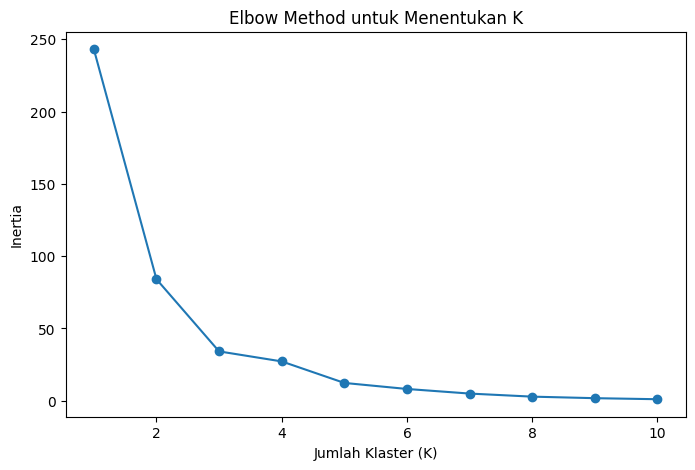

In [ ]:
# Plot hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K')
plt.show()

In [ ]:
# 2. Tentukan jumlah klaster (K)
# Gunakan fitur numerik untuk clustering
# 3. Jalankan algoritma clustering.
K = 3
clustering_features = df[numeric_columns]
kmeans = KMeans(n_clusters=K, random_state=42)
df_selected.loc[:, 'cluster'] = kmeans.fit_predict(clustering_features)


In [ ]:
# 4. Simpan hasil klaster.
# Simpan hasil klaster
processed_file_name = "processed_data_with_clusters.csv"
df_selected.to_csv(processed_file_name, index=False)
print(f"\nDataset yang telah diproses dan diklasterisasi disimpan sebagai {processed_file_name}")


Dataset yang telah diproses dan diklasterisasi disimpan sebagai processed_data_with_clusters.csv


In [ ]:
# Menampilkan hasil clustering
print("\nHasil Clustering:")
display(df_selected.head())


Hasil Clustering:


,title,release_year,rating,cluster
9,The Starling,1.0,PG-13,0
12,Je Suis Karl,1.0,TV-MA,0
28,Dark Skies,0.2,PG-13,2
29,Paranoia,0.2,PG-13,2
38,Birth of the Dragon,0.6,PG-13,1


In [ ]:
# Langkah 3: Penggabungan dengan Machine Learning
# 1. Pilih model machine learning (Logistic Regression)
# 2. Gunakan hasil klaster sebagai fitur tambahan
X = df_selected[['release_year', 'cluster']]
# Konversi rating ke numerik
y = df_selected['rating'].astype('category').cat.codes

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

In [ ]:
# 4. Evaluasi kinerja model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns # Import seaborn for heatmap
import matplotlib.pyplot as plt # Import matplotlib for plotting

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Akurasi Model: 0.43

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        92
           6       0.35      0.07      0.11       181
           7       0.00      0.00      0.00        10
           8       0.43      0.98      0.60       332
           9       0.00      0.00      0.00        55
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        11

    accuracy                           0.43       790
   macro avg       0.07      0.09      0.06       790
weighted avg       0.26      0.43      0.28       790


Confusion Matrix:
[[  0   0   0   0   0   0   0   0   4   0   0   0]
 [  0   0   0   0 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x500 with 0 Axes>

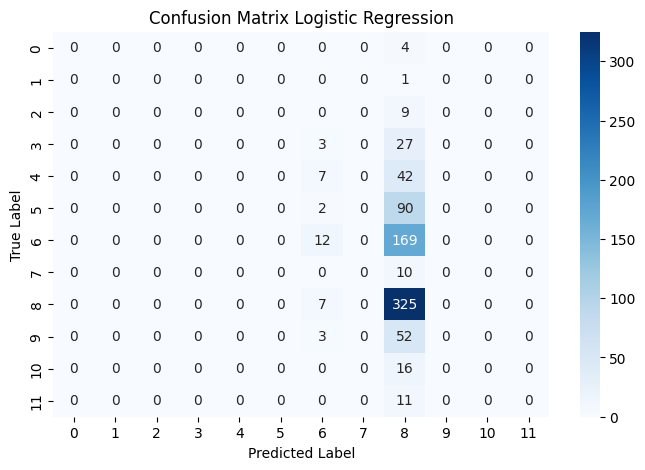

In [ ]:
# Visualisasi Model Logistic Regression
plt.figure(figsize=(8, 5))
cm = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Create heatmap
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

In [ ]:
# langkah 4 Evaluasi dan Pengoptimalan
# 1. Evaluasi kinerja model (akurasi, presisi, recall).
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Gunakan average='weighted' untuk multi-class
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\nAkurasi Model: {accuracy:.2f}")
print(f"Presisi Model: {precision:.2f}")
print(f"Recall Model: {recall:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi Model: 0.43
Presisi Model: 0.26
Recall Model: 0.43

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        92
           6       0.35      0.07      0.11       181
           7       0.00      0.00      0.00        10
           8       0.43      0.98      0.60       332
           9       0.00      0.00      0.00        55
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        11

    accuracy                           0.43       790
   macro avg       0.07      0.09      0.06       790
weighted avg       0.26      0.43      0.28       790


Confusion Matrix:
[[  0   0   0   0   0   0   0 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# 2. Lakukan pengoptimalan hyperparameter

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Definisikan parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000] # Menambahkan max_iter
}

# Buat objek GridSearchCV dengan StratifiedKFold
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                          scoring='accuracy')


In [ ]:
# 3. Bandingkan hasil dengan model tanpa clustering
# Model tanpa clustering
X_no_cluster = df_selected[['release_year']]
X_train_no_cluster, X_test_no_cluster, y_train_no_cluster, y_test_no_cluster = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42)

model_no_cluster = LogisticRegression()
model_no_cluster.fit(X_train_no_cluster, y_train_no_cluster)

y_pred_no_cluster = model_no_cluster.predict(X_test_no_cluster)
accuracy_no_cluster = accuracy_score(y_test_no_cluster, y_pred_no_cluster)

print(f"\nAkurasi Model (Tanpa Clustering): {accuracy_no_cluster:.2f}")


Akurasi Model (Tanpa Clustering): 0.41


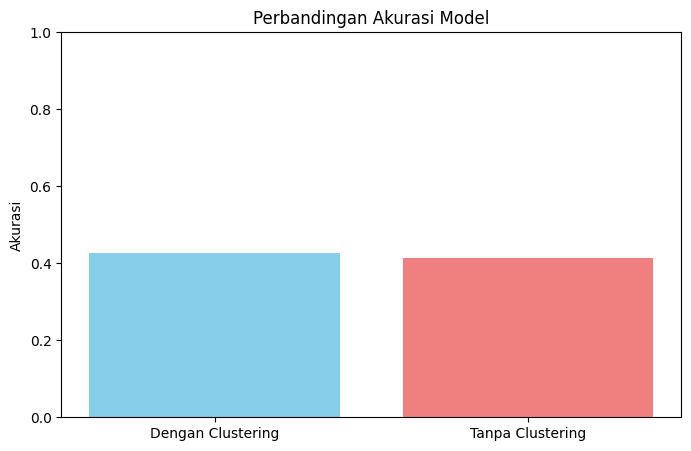

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi akurasi perbandingan kedua model
models = ['Dengan Clustering', 'Tanpa Clustering']
accuracies = [accuracy_optimized, accuracy_no_cluster]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim([0, 1])
plt.show()